In [53]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import functools
from datetime import date
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [54]:
customer = pd.read_csv('./files_for_lab/customer_churn.csv')
customer.columns = [i.lower().replace(' ', '_') for i in customer.columns]
customer.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
customer = customer[['seniorcitizen','tenure','monthlycharges','churn']]  #extracting desired values
customer.head()

,seniorcitizen,tenure,monthlycharges,churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes


In [56]:
customer.isna().sum()

seniorcitizen     0
tenure            0
monthlycharges    0
churn             0
dtype: int64

In [57]:
def cleanOperation(y):
    
    if  (y =='No'):
        return '0'
    elif (y =='Yes'):
        return '1'

customer['churn'] = list(map(cleanOperation, customer['churn']))
customer['churn'] = pd.to_numeric(customer['churn'])

# converting no and yes to 0 and 1 respectively

In [58]:
y = customer['churn']
customer.drop(['churn'], axis=1, inplace=True)
customer.head()
X = customer   #x/y split

In [59]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

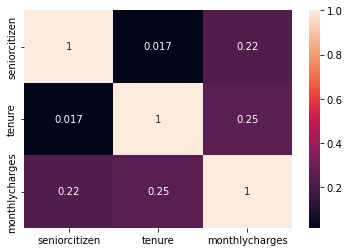

In [60]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)   #train/test split

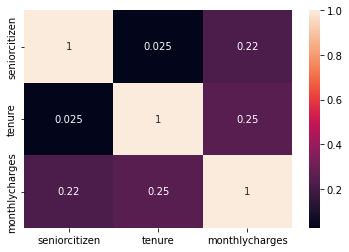

In [80]:
correlations_matrix = X_train.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [62]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()   

#scaling the values in our X

,seniorcitizen,tenure,monthlycharges
0,-0.439763,1.612532,0.674154
1,2.273954,-0.747907,-0.614894
2,-0.439763,1.571835,-1.335097
3,-0.439763,0.025340,0.301578
4,-0.439763,0.595101,1.128231


In [63]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 



In [64]:
LR = LogisticRegression(random_state=0, solver='lbfgs')  #applying logistic regression model to our data
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [65]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)  #applying logistic regression model to our data

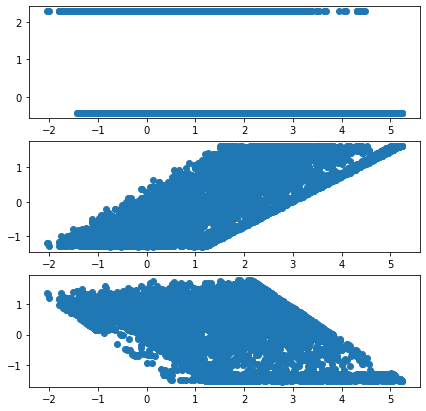

In [66]:
fig, ax = plt.subplots(3, figsize=(7, 7))
ax[0].scatter(logits,X_train_scaled['seniorcitizen'])
ax[1].scatter(logits,X_train_scaled['tenure'])
ax[2].scatter(logits,X_train_scaled['monthlycharges'])   #plot to check for linearity, strong linearity for tenure and monthlycharges

In [68]:
y.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [69]:
LR.score(X_test_scaled, y_test)  #lr score of 78% because of strong linearity in 2 of our 3 features

0.7821149751596878

In [70]:
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))     #confusion matrix for our model, seems to be pretty balanced 

precision:  0.6101083032490975
recall:  0.4592391304347826
f1:  0.524031007751938


In [74]:
confusion_matrix(y_test,pred) #confusion matrix for our model, seems to be pretty balanced 

array([[933, 108],
       [199, 169]], dtype=int64)

In [76]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train) # applying smote

In [77]:
X_train_SMOTE.shape

(8266, 3)

In [81]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))  #value for recall is way higher than it was with a normal logistic regression

precision:  0.4744525547445255
recall:  0.7065217391304348
f1:  0.5676855895196506


In [83]:
confusion_matrix(y_test,pred)

array([[753, 288],
       [108, 260]], dtype=int64)

In [82]:
LR.score(X_test_scaled, y_test) 

0.7189496096522356